## <font color=purple>Machine Learning</font>

<font color=green>An Introduction to Basics and definition.</font>

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture as GMM
from sklearn.datasets import load_digits
from sklearn.manifold import Isomap
from sklearn.metrics import confusion_matrix

In [4]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


We may wish to construct a model that can predict the species of flower based on the other measurements; in this case, the `species` column would be considered the target array.

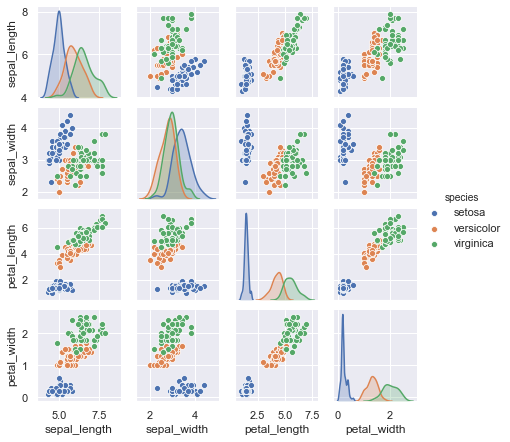

In [8]:
%matplotlib inline
sns.set()
sns.pairplot(iris, hue='species', height=1.5);

Feature Matrix(X):

In [9]:
X_iris = iris.drop('species', axis=1) # a DataFrame
X_iris.shape

(150, 4)

Target Vector(y):

In [10]:
y_iris = iris['species'] # a Series object
y_iris.shape

(150,)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


## <font color=green>Supervised learning example: Simple linear regression</font>

- the common case of fitting a line to *(x,y)* data

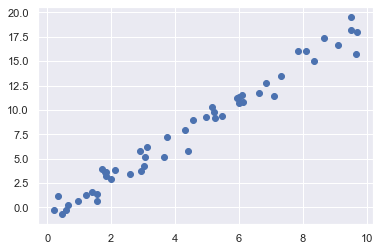

In [15]:
rng = np.random.RandomState(42) #random number generator
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

In [36]:
model = LinearRegression(fit_intercept=True) #fit_intercept hyperparameter
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
X = x[:, np.newaxis] #reshape the 1D array into a feature matrix
X.shape

(50, 1)

In [32]:
x.shape

(50,)

In [34]:
y.shape

(50,)

In [38]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- These two parameters represent the slope and intercept of the simple linear fit to the data.

In [39]:
model.coef_ #slope or gradient

array([1.9776566])

In [40]:
model.intercept_ #y-intercept

-0.9033107255311164

In [41]:
xfit = np.linspace(-1, 11) #test data

In [42]:
Xfit = xfit[:, np.newaxis] #[n_samples, n_features] features matrix
yfit = model.predict(Xfit) #what y values the model prdicts

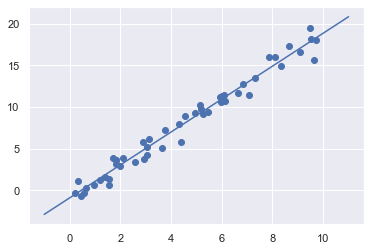

In [43]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

## <font color=green>Supervised learning example: Iris Classification</font>

In [50]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

In [54]:
 # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

In [56]:
accuracy_score(ytest, y_model)
#we can use the accuracy_score utility to see the fraction of predicted labels that match their true value
#97% accuracy

0.9736842105263158

## <font color=green>Unsupervised learning example: Iris Dimensionality</font>

-  reducing the dimensionality of the Iris data so as to more easily visualize it
- The task of dimensionality reduction is to ask whether there is a suitable lower-dimensional representation that retains the essential features of the data.

In [58]:
# 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris)         # 4. Transform the data to two dimensions

-  A quick way to plot the results, is to insert them into the original Iris DataFrame, and use Seaborn's lmplot to show the results

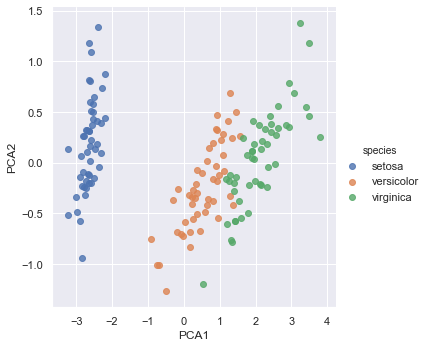

In [59]:
iris['PCA1'] = X_2D[:, 0] #add columns with the newly transformed dimensions
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

## <font color=green>Unsupervised learning : Iris Clustering</font>

- A clustering algorithm attempts to find distinct groups of data without reference to any labels.
-  use a powerful clustering method called a Gaussian mixture model (GMM)
- A GMM attempts to model the data as a collection of Gaussian blobs.

In [66]:
# 1. Choose the model class
model = GMM(n_components=3,
            covariance_type='full')  # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                    # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris)        # 4. Determine cluster labels

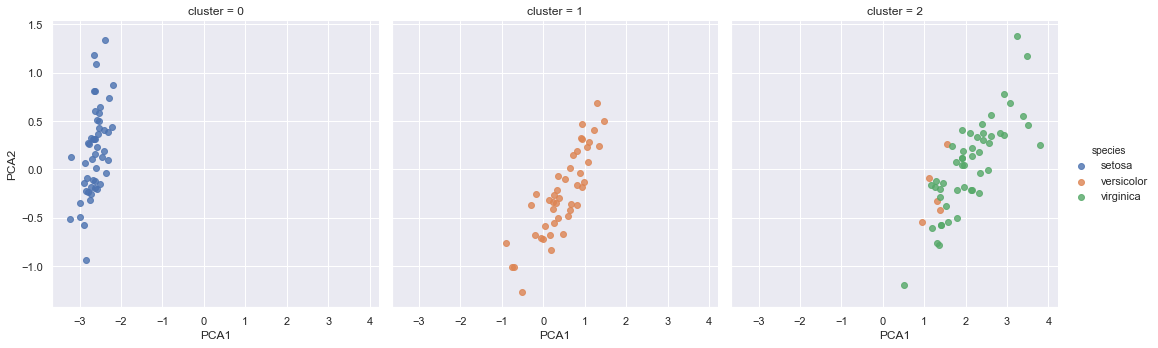

In [67]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species',
           col='cluster', fit_reg=False);
#add the cluster label to the df and iuse seaborn to plot the results

#### Conclusion:
*The measurements of these flowers are distinct enough that we could automatically identify the presence of these different groups of species with a simple clustering algorithm!*

## <font color=green>Application: Exploring Hand-written Digits</font>

- locating and identifying characters in an image.

1. Loading and visualizing the digits data.

In [3]:
digits = load_digits()
digits.images.shape

(1797, 8, 8)

In [8]:
digits.images.size

115008

In [9]:
digits.images.ndim #number of dimensions

3

*The images data is a three-dimensional array: 1,797 samples each consisting of an 8 × 8 grid of pixels*

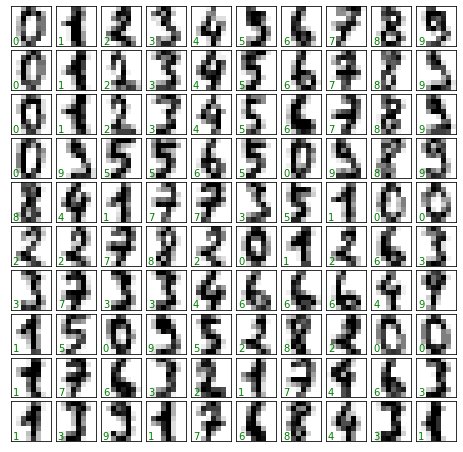

In [10]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [18]:
X = digits.data
X.shape #1797 samples and 64 features

(1797, 64)

In [12]:
y = digits.target
y.shape

(1797,)

2. Unsupervised learning: Dimensionality reduction

In [14]:
#we'll reduce the dimensions to 2, using an unsupervised method
#64 dimensions are too high to visualize
#we'll make use of a manifold learning algorithm called Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

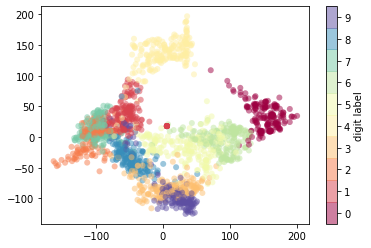

In [16]:
#Let's plot this data to see if we can learn anything from its structure:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

3. Classification on digits

In [19]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [20]:
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [21]:
accuracy_score(ytest, y_model)

0.8333333333333334

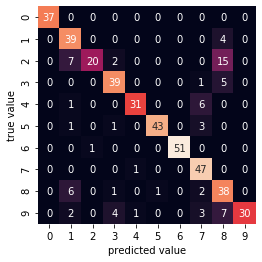

In [23]:
mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

#### This shows us where the mis-labeled points tend to be: for example, a large number of twos here are mis-classified as either ones or eights.

##### Another way to gain intuition into the characteristics of the model is to plot the inputs again, with their predicted labels.

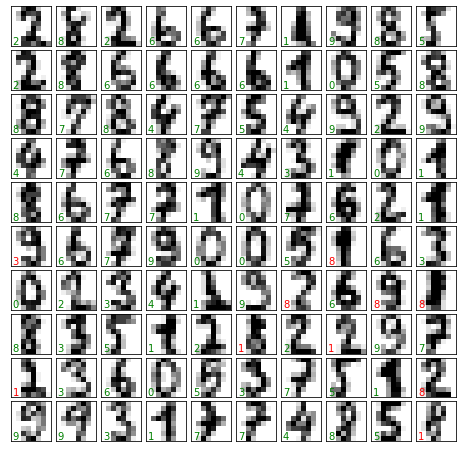

In [26]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')

### Conclusion:
Examining this subset of the data, we can gain insight regarding where the algorithm might be not performing optimally.
To go beyond our 80% classification rate, we might move to a more sophisticated algorithm such as Support Vector Machines, Random forests, etc.